In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
nsei = yf.Ticker("^NSEI")
nsei_history = nsei.history(period="180d")
nsei = nsei_history
nsei.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-16,15832.250000,15863.150391,15335.099609,15360.599609,264700,0,0
2022-06-17,15272.650391,15400.400391,15183.400391,15293.500000,342600,0,0
2022-06-20,15334.500000,15382.500000,15191.099609,15350.150391,260000,0,0
2022-06-21,15455.950195,15707.250000,15419.849609,15638.799805,262800,0,0
2022-06-22,15545.650391,15565.400391,15385.950195,15413.299805,220900,0,0
2022-06-23,15451.549805,15628.450195,15367.500000,15556.650391,259200,0,0
2022-06-24,15657.400391,15749.250000,15619.450195,15699.250000,219600,0,0
2022-06-27,15926.200195,15927.450195,15815.500000,15832.049805,210900,0,0
2022-06-28,15757.450195,15892.099609,15710.150391,15850.200195,251900,0,0


In [3]:
nsei.shape

(180, 7)

In [4]:
nsei.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [5]:
#Today volume will be conisider as zero
min_vol = nsei["Volume"].sort_values()
min_vol

Date
2022-08-16         0
2022-10-24     45000
2022-12-19    154800
2022-12-20    169000
2023-02-20    174600
               ...  
2022-09-16    468500
2023-01-27    476300
2023-02-02    490100
2022-09-26    492000
2023-02-01    512900
Name: Volume, Length: 180, dtype: int64

In [6]:
nsei.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.0,180.0
mean,17537.571132,17617.856424,17435.671946,17531.431071,265563.333333,0.0,0.0
std,823.412677,810.369408,824.901891,817.224039,73608.302680,0.0,0.0
min,15272.650391,15382.500000,15183.400391,15293.500000,0.000000,0.0,0.0
25%,17252.837891,17345.750488,17159.637695,17309.837891,216750.000000,0.0,0.0
50%,17755.875000,17811.325195,17634.474609,17719.924805,256050.000000,0.0,0.0
75%,18093.699707,18146.399414,18015.636719,18087.437012,289950.000000,0.0,0.0
max,18871.949219,18887.599609,18778.199219,18812.500000,512900.000000,0.0,0.0


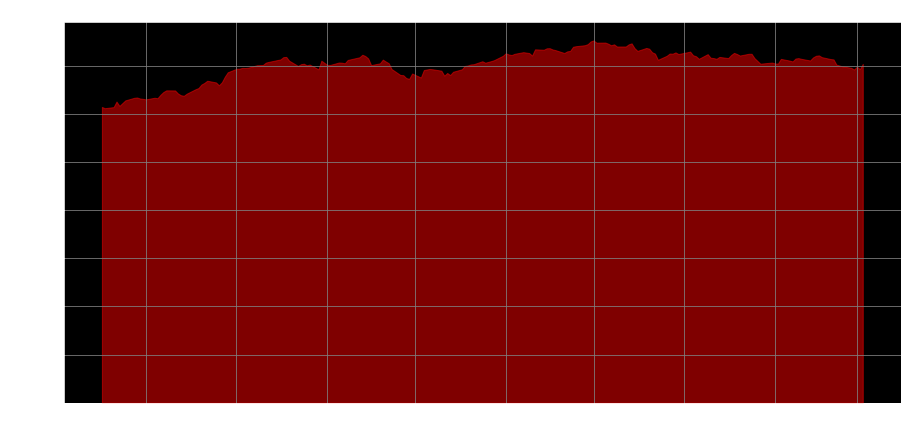

In [7]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.stackplot(nsei.index, nsei["Close"], color="red", alpha=0.50)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Price (₹)",fontsize=14)
plt.title("NSEI")
plt.show()
plt.close()

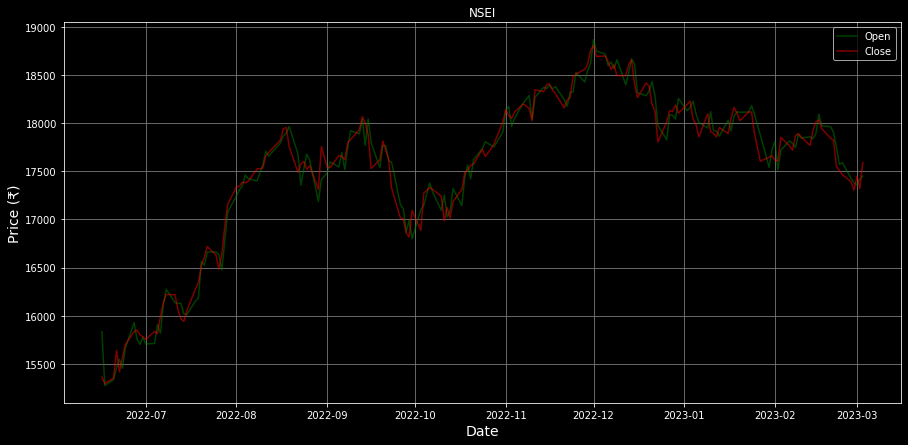

In [8]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.plot(nsei.index, nsei["Open"], color="green", label="Open", alpha=0.50)
plt.plot(nsei.index, nsei["Close"], color="red", label="Close", alpha=0.50)
plt.legend()
plt.xlabel("Date",fontsize=14)
plt.ylabel("Price (₹)",fontsize=14)
plt.title("NSEI")
plt.show()
plt.close()

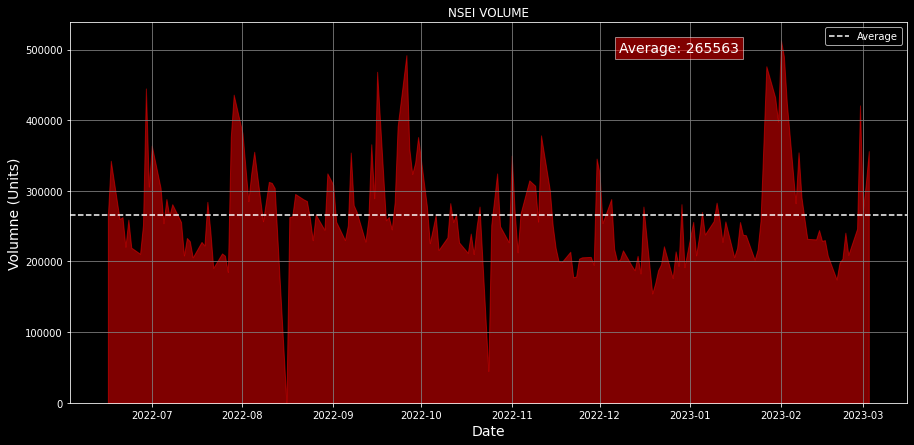

In [9]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.stackplot(nsei.index, nsei["Volume"], color="red", alpha=0.50)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Volumne (Units)",fontsize=14)
plt.title("NSEI VOLUME")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
average = nsei["Volume"].mean()
plt.axhline(average, color="white", linestyle="--", label="Average")
plt.legend()
plt.text(0.8, 0.95, 'Average: {:.0f}'.format(average), transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='red', alpha=0.5))
plt.show()
plt.close()

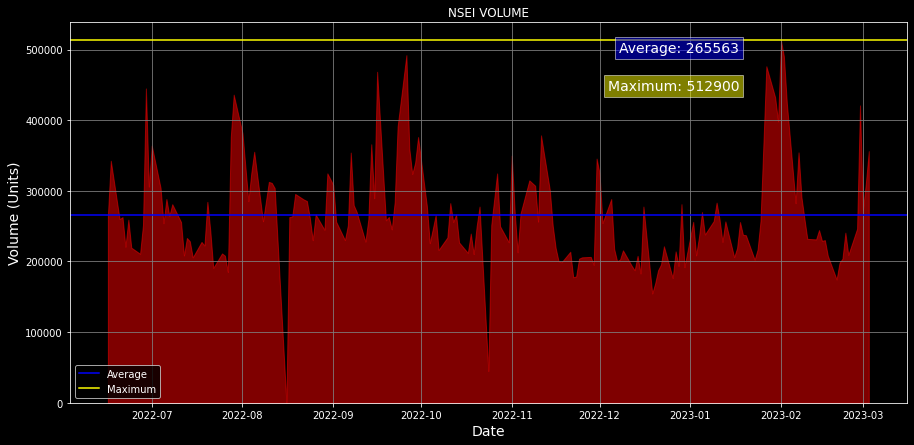

In [10]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.stackplot(nsei.index, nsei["Volume"], color="red", alpha=0.50)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Volume (Units)",fontsize=14)
plt.title("NSEI VOLUME")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

average = nsei["Volume"].mean()
# minimum = nsei["Volume"].min()
maximum = nsei["Volume"].max()

plt.axhline(average, color="blue", label="Average")
# plt.axhline(minimum, color="white", label="Minimum")
plt.axhline(maximum, color="yellow", label="Maximum")
plt.legend()

plt.text(0.8, 0.95, 'Average: {:.0f}'.format(average), transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='blue', alpha=0.5))
# plt.text(0.8, 0.90, 'Minimum: {:.0f}'.format(minimum), transform=plt.gca().transAxes,
#          fontsize=14, verticalalignment='top', horizontalalignment='right',
#          bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.8, 0.85, 'Maximum: {:.0f}'.format(maximum), transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='yellow', alpha=0.5))
plt.show()
plt.close()

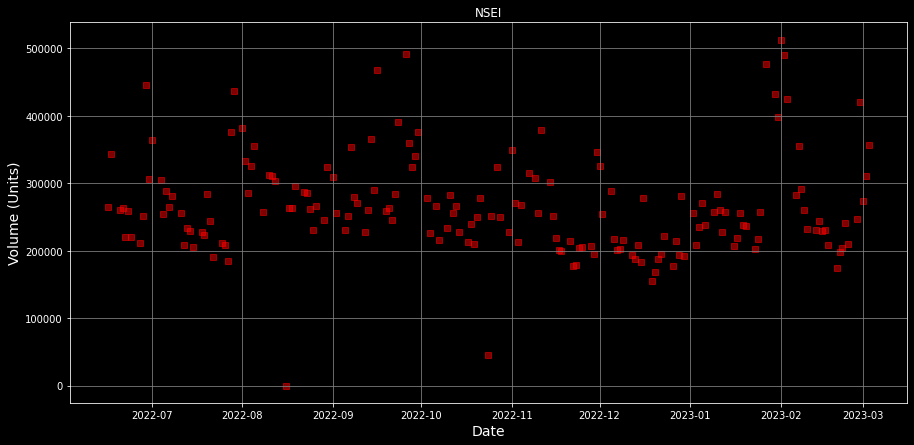

In [11]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei.index, nsei["Volume"], color="red", marker="s", alpha=0.50)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xlabel("Date",fontsize=14)
plt.ylabel("Volume (Units)",fontsize=14)
plt.title("NSEI")
plt.show()
plt.close()

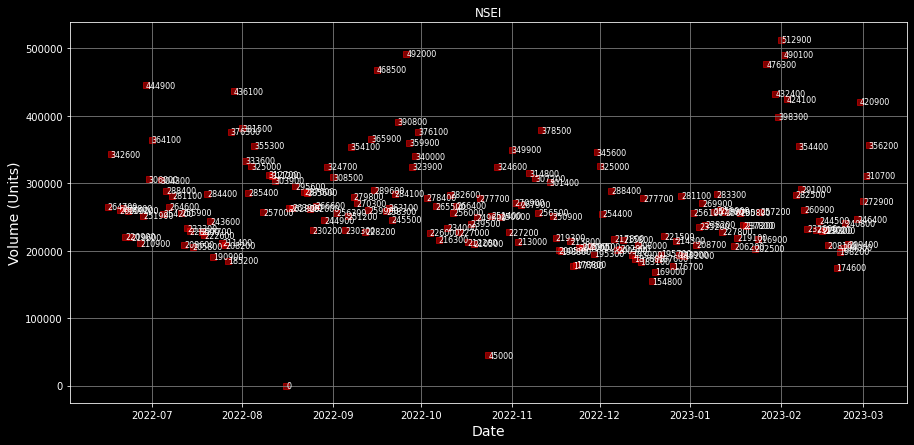

In [12]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei.index, nsei["Volume"], color="red", marker="s", alpha=0.50)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xlabel("Date",fontsize=14)
plt.ylabel("Volume (Units)",fontsize=14)
plt.title("NSEI")

for i, txt in enumerate(nsei["Volume"]):
    plt.text(nsei.index[i], nsei["Volume"][i], txt, fontsize=8, verticalalignment='center')

plt.show()
plt.close()

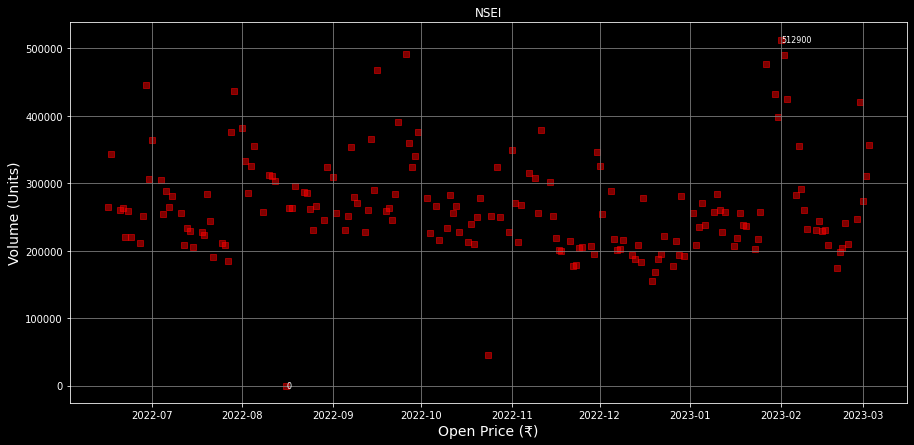

In [13]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei.index, nsei["Volume"], color="red", marker="s", alpha=0.50)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xlabel("Open Price (₹)",fontsize=14)
plt.ylabel("Volume (Units)",fontsize=14)
plt.title("NSEI")

min_vol = nsei["Volume"].min()
max_vol = nsei["Volume"].max()

for i, txt in enumerate(nsei["Volume"]):
    if txt == min_vol or txt == max_vol:
        plt.text(nsei.index[i], nsei["Volume"][i], txt, fontsize=8, verticalalignment='center')

plt.show()
plt.close()

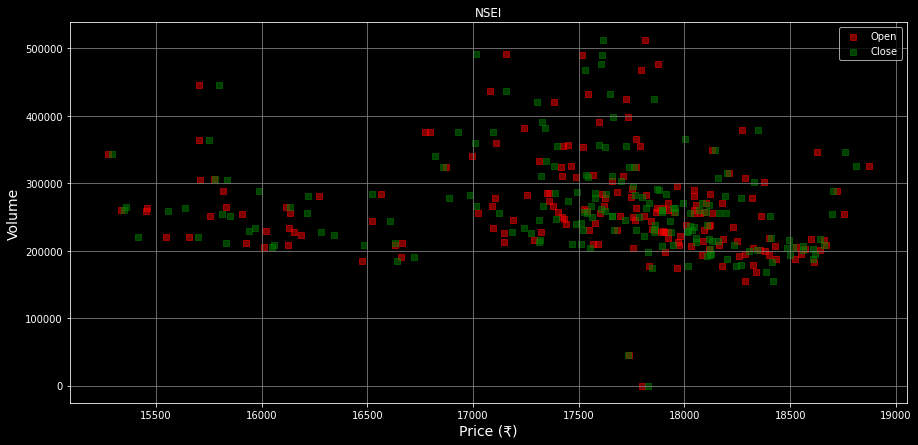

In [14]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei["Open"], nsei["Volume"], color="red", marker="s", alpha=0.50, label="Open")
plt.scatter(nsei["Close"], nsei["Volume"], color="green", marker="s", alpha=0.50, label="Close")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xlabel("Price (₹)",fontsize=14)
plt.ylabel("Volume",fontsize=14)
plt.title("NSEI")
plt.legend()
plt.show()
plt.close()

In [15]:
reliance = yf.Ticker("RELIANCE.NS")
reliance_history = reliance.history(period="180d")
reliance = reliance_history
reliance.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-16,2615.126567,2651.068405,2546.333684,2552.315674,7896943,0.0,0
2022-06-17,2552.315637,2616.971074,2548.427441,2582.225586,11286988,0.0,0
2022-06-20,2597.180498,2609.244275,2513.532441,2535.416504,5568825,0.0,0
2022-06-21,2552.315749,2585.615396,2520.710950,2576.343506,5408801,0.0,0
2022-06-22,2550.421514,2550.620865,2493.492812,2498.079102,4899839,0.0,0
2022-06-23,2507.500740,2517.420825,2437.660957,2457.551025,8974475,0.0,0
2022-06-24,2472.555790,2503.462737,2460.591810,2492.545654,6571866,0.0,0
2022-06-27,2537.310785,2537.310785,2474.101189,2485.167725,7141493,0.0,0
2022-06-28,2474.649572,2526.343788,2474.649572,2520.112549,6263867,0.0,0


In [16]:
reliance.shape

(180, 7)

In [17]:
reliance.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [18]:
reliance.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,180.000000,180.000000,180.000000,180.000000,1.800000e+02,180.000000,180.0
mean,2506.080397,2528.673865,2480.359361,2503.273387,6.041515e+06,0.044444,0.0
std,102.870602,102.973950,103.204432,104.146678,3.562262e+06,0.596285,0.0
min,2311.000000,2321.000000,2293.000000,2305.899902,1.555270e+06,0.000000,0.0
25%,2414.487427,2434.657415,2387.837524,2413.196106,4.002328e+06,0.000000,0.0
50%,2524.175049,2544.974976,2492.946307,2511.900024,5.222126e+06,0.000000,0.0
75%,2586.125000,2609.061069,2564.500000,2584.724976,6.983356e+06,0.000000,0.0
max,2741.800049,2755.000000,2716.000000,2731.350098,3.784167e+07,8.000000,0.0


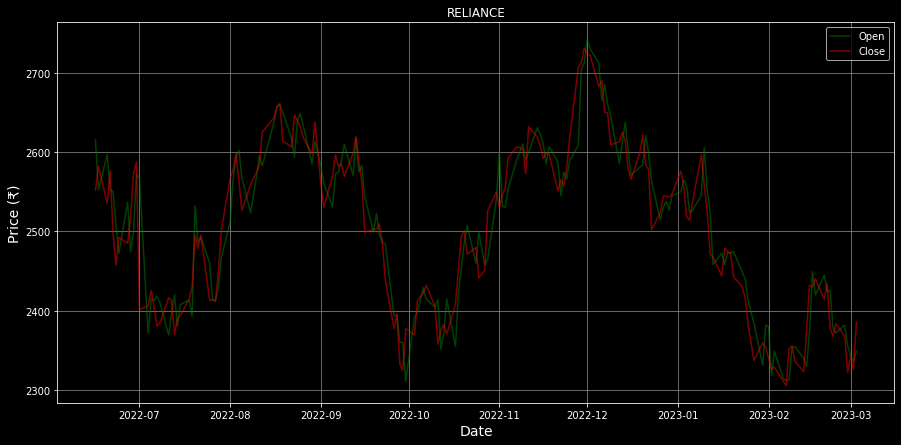

In [19]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.plot(reliance.index, reliance ["Open"], color="green", label="Open", alpha=0.50)
plt.plot(reliance.index, reliance ["Close"], color="red", label="Close", alpha=0.50)
plt.legend()
plt.xlabel("Date",fontsize=14)
plt.ylabel("Price (₹)",fontsize=14)
plt.title("RELIANCE")
plt.show()
plt.close()

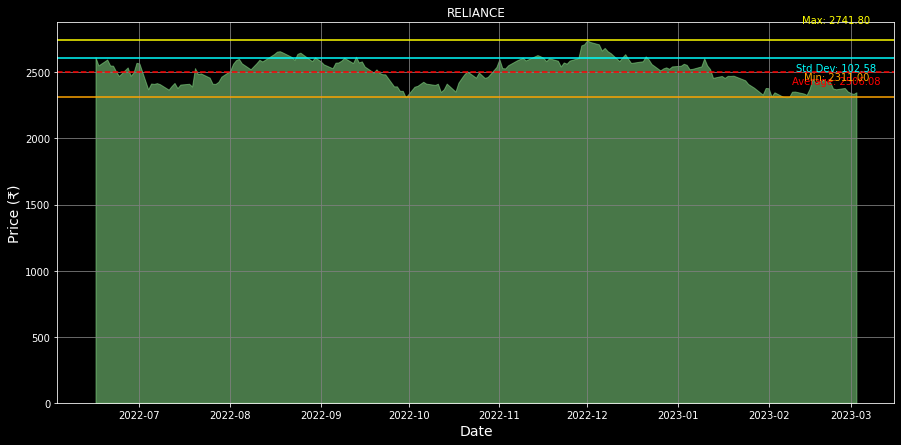

In [20]:
# plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.stackplot(reliance.index, reliance["Open"], color="lightgreen", alpha=0.50)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Price (₹)",fontsize=14)
plt.title("RELIANCE")

open_avg = reliance["Open"].mean()
open_min = reliance["Open"].min()
open_max = reliance["Open"].max()
open_std = np.std(reliance["Open"])

plt.axhline(open_avg, color="red", label="Open Average", linestyle="--")
plt.axhline(open_min, color="orange", label="Open Min")
plt.axhline(open_max, color="yellow", label="Open Max")
plt.axhline(open_avg + open_std, color="cyan", label="Open Std Dev")

plt.annotate(f"Average: {open_avg:.2f}", (reliance.index[-1], open_avg), xytext=(-20,-15), textcoords='offset points', color='red', fontsize=10, ha='center', va='bottom')
plt.annotate(f"Min: {open_min:.2f}", (reliance.index[-1], open_min), xytext=(-20,15), textcoords='offset points', color='orange', fontsize=10, ha='center', va='bottom')
plt.annotate(f"Max: {open_max:.2f}", (reliance.index[-1], open_max), xytext=(-20,15), textcoords='offset points', color='yellow', fontsize=10, ha='center', va='bottom')
plt.annotate(f"Std Dev: {open_std:.2f}", (reliance.index[-1], open_avg + open_std), xytext=(-20,-15), textcoords='offset points', color='cyan', fontsize=10, ha='center', va='bottom')

plt.show()
plt.close()

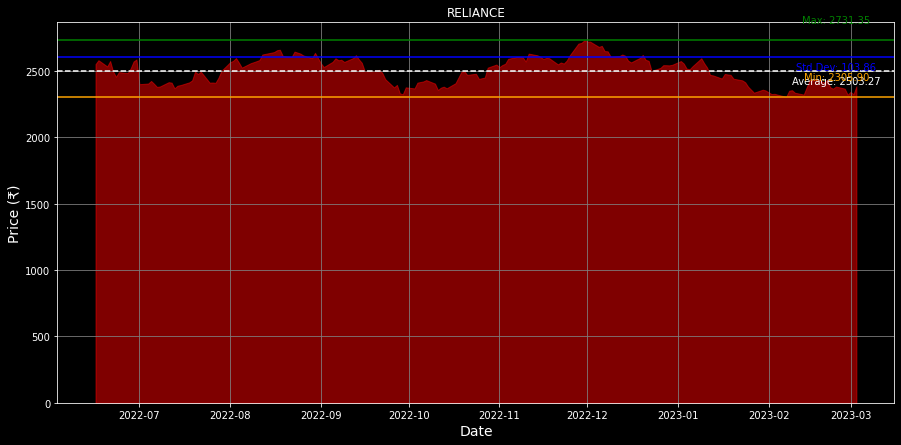

In [21]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.stackplot(reliance.index, reliance["Close"], color="red", alpha=0.50)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Price (₹)",fontsize=14)
plt.title("RELIANCE")

close_avg = reliance["Close"].mean()
close_min = reliance["Close"].min()
close_max = reliance["Close"].max()
close_std = np.std(reliance["Close"])

plt.axhline(close_avg, color="white", label="Close Average", linestyle="--")
plt.axhline(close_min, color="orange", label="Close Min")
plt.axhline(close_max, color="green", label="Close Max")
plt.axhline(close_avg + close_std, color="blue", label="Close Std Dev")

plt.annotate(f"Average: {close_avg:.2f}", (reliance.index[-1], close_avg), xytext=(-20,-15), textcoords='offset points', color='white', fontsize=10, ha='center', va='bottom')
plt.annotate(f"Min: {close_min:.2f}", (reliance.index[-1], close_min), xytext=(-20,15), textcoords='offset points', color='orange', fontsize=10, ha='center', va='bottom')
plt.annotate(f"Max: {close_max:.2f}", (reliance.index[-1], close_max), xytext=(-20,15), textcoords='offset points', color='green', fontsize=10, ha='center', va='bottom')
plt.annotate(f"Std Dev: {close_std:.2f}", (reliance.index[-1], close_avg + close_std), xytext=(-20,-15), textcoords='offset points', color='blue', fontsize=10, ha='center', va='bottom')

plt.show()
plt.close()

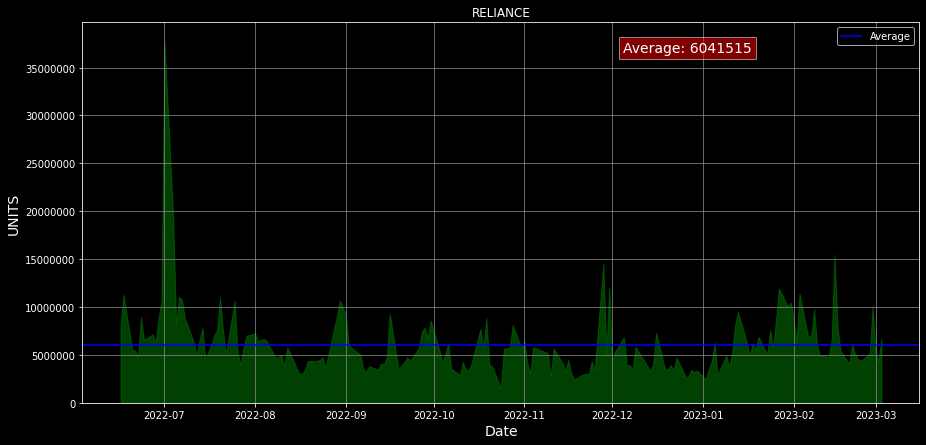

In [22]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.stackplot(nsei.index, reliance["Volume"], color="green", alpha=0.50)
plt.xlabel("Date",fontsize=14)
plt.ylabel("UNITS",fontsize=14)
plt.title("RELIANCE")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

average = reliance["Volume"].mean()
plt.axhline(average, color="blue", label="Average")
plt.legend()

plt.text(0.8, 0.95, 'Average: {:.0f}'.format(average), transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='red', alpha=0.5))
plt.show()
plt.close()

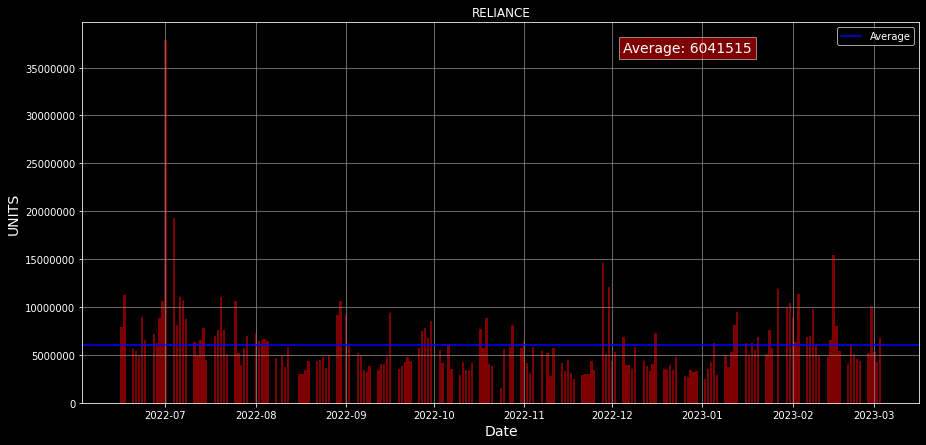

In [23]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.bar(nsei.index, reliance["Volume"], color="red", alpha=0.50)
plt.xlabel("Date",fontsize=14)
plt.ylabel("UNITS",fontsize=14)
plt.title("RELIANCE")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

average = reliance["Volume"].mean()
plt.axhline(average, color="blue", label="Average")
plt.legend()

plt.text(0.8, 0.95, 'Average: {:.0f}'.format(average), transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='red', alpha=0.5))
plt.show()
plt.close()

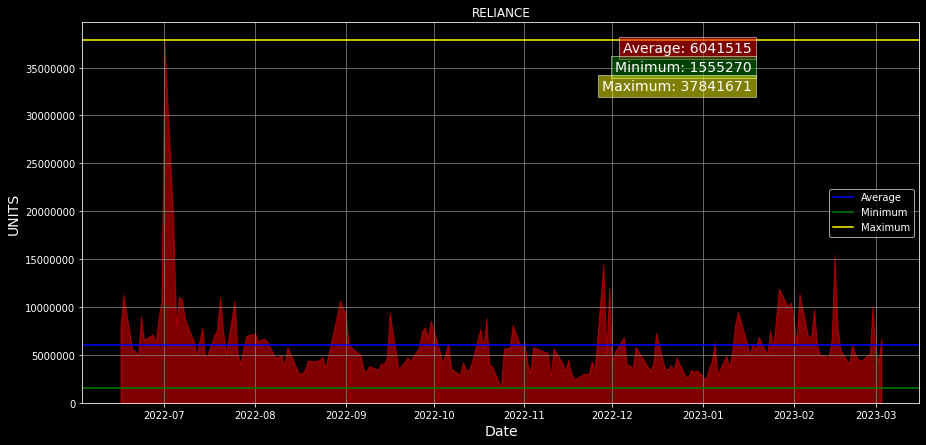

In [24]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.stackplot(nsei.index, reliance["Volume"], color="red", alpha=0.50)
plt.xlabel("Date",fontsize=14)
plt.ylabel("UNITS",fontsize=14)
plt.title("RELIANCE")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

average = reliance["Volume"].mean()
minimum = reliance["Volume"].min()
maximum = reliance["Volume"].max()

plt.axhline(average, color="blue", label="Average")
plt.axhline(minimum, color="green", label="Minimum")
plt.axhline(maximum, color="yellow", label="Maximum")
plt.legend()

plt.text(0.8, 0.95, 'Average: {:.0f}'.format(average), transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='red', alpha=0.5))
plt.text(0.8, 0.90, 'Minimum: {:.0f}'.format(minimum), transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='green', alpha=0.5))
plt.text(0.8, 0.85, 'Maximum: {:.0f}'.format(maximum), transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='yellow', alpha=0.5))
plt.show()
plt.close()

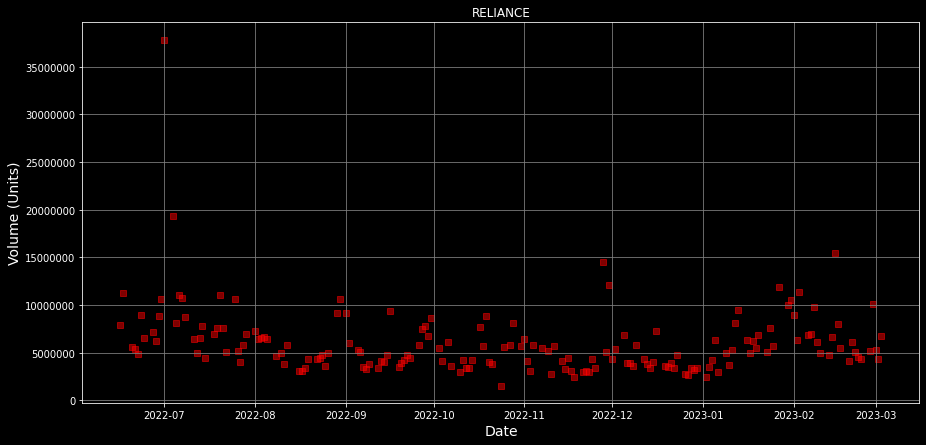

In [25]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei.index, reliance["Volume"], color="red", marker="s", alpha=0.50)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xlabel("Date",fontsize=14)
plt.ylabel("Volume (Units)",fontsize=14)
plt.title("RELIANCE")
plt.show()
plt.close()

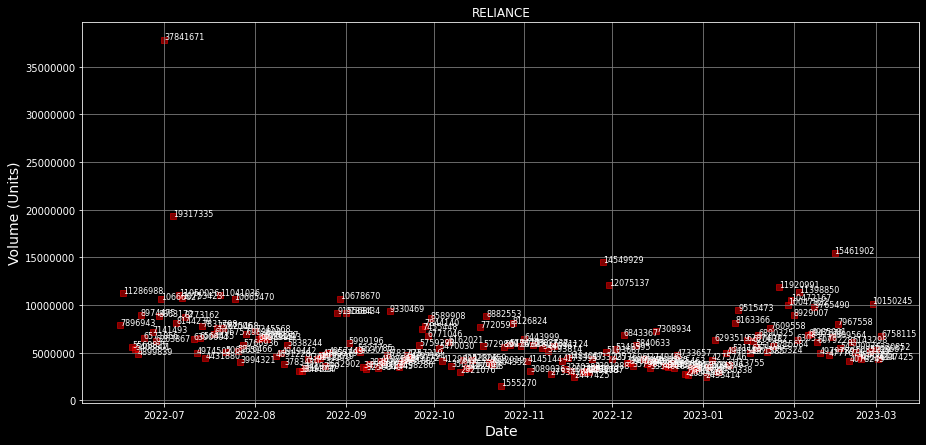

In [26]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei.index, reliance["Volume"], color="red", marker="s", alpha=0.50)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xlabel("Date",fontsize=14)
plt.ylabel("Volume (Units)",fontsize=14)
plt.title("RELIANCE")

for i, txt in enumerate(reliance["Volume"]):
    plt.annotate(txt, (nsei.index[i], reliance["Volume"][i]), fontsize=8)

plt.show()
plt.close()

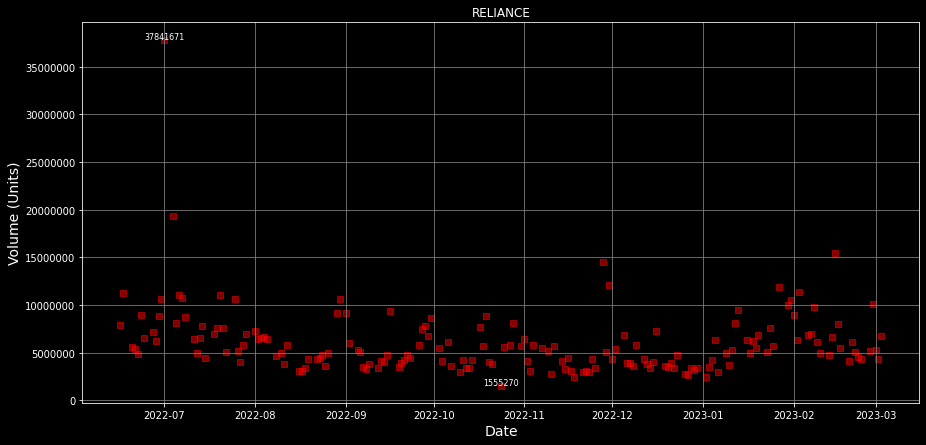

In [27]:
df = pd.DataFrame({"Date": nsei.index, "Volume": reliance["Volume"]})
min_index = reliance["Volume"].idxmin()
max_index = reliance["Volume"].idxmax()

plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(df["Date"], df["Volume"], color="red", marker="s", alpha=0.50)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xlabel("Date",fontsize=14)
plt.ylabel("Volume (Units)",fontsize=14)
plt.title("RELIANCE")

plt.annotate(df["Volume"][min_index], (df["Date"][min_index], df["Volume"][min_index]), fontsize=8, ha='center')
plt.annotate(df["Volume"][max_index], (df["Date"][max_index], df["Volume"][max_index]), fontsize=8, ha='center')

plt.show()
plt.close()

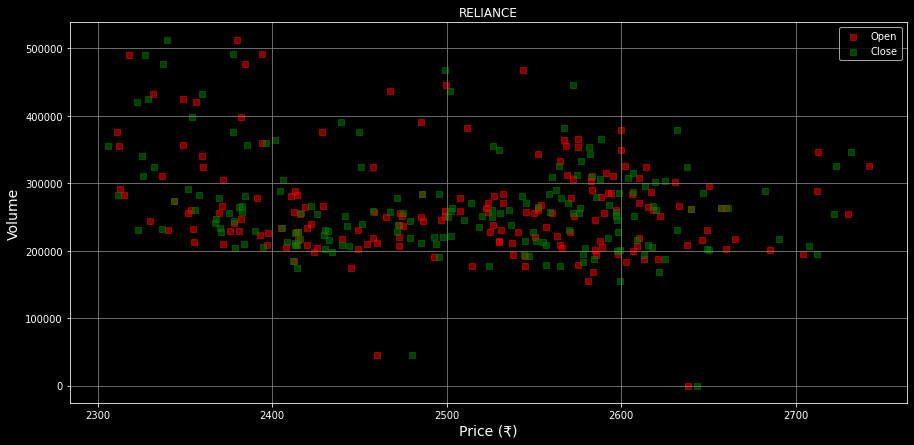

In [28]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(reliance["Open"], nsei["Volume"], color="red", marker="s", alpha=0.50, label="Open")
plt.scatter(reliance["Close"], nsei["Volume"], color="green", marker="s", alpha=0.50, label="Close")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xlabel("Price (₹)",fontsize=14)
plt.ylabel("Volume",fontsize=14)
plt.title("RELIANCE")
plt.legend()
plt.show()
plt.close()

In [29]:
# Declaring Independent and Dependent Variable
y = nsei["Open"]
x = reliance["Open"]

In [30]:
y[:10]

Date
2022-06-16    15832.250000
2022-06-17    15272.650391
2022-06-20    15334.500000
2022-06-21    15455.950195
2022-06-22    15545.650391
2022-06-23    15451.549805
2022-06-24    15657.400391
2022-06-27    15926.200195
2022-06-28    15757.450195
2022-06-29    15701.700195
Name: Open, dtype: float64

In [31]:
y.shape

(180,)

In [32]:
x[:10]

Date
2022-06-16    2615.126567
2022-06-17    2552.315637
2022-06-20    2597.180498
2022-06-21    2552.315749
2022-06-22    2550.421514
2022-06-23    2507.500740
2022-06-24    2472.555790
2022-06-27    2537.310785
2022-06-28    2474.649572
2022-06-29    2499.674053
Name: Open, dtype: float64

In [33]:
x.shape

(180,)

In [34]:
'''Linear regression is a statistical method used to model the relationship between a dependent variable 
and one or more independent variables by fitting a linear equation to the observed data. In simple linear regression, 
there is only one independent variable and the relationship between the two variables is represented by a line. 
In multiple linear regression, there are two or more independent variables.

'''
def Linear_Regression(x, y):
    #x mean value
    x_mean = sum(x)/len(x)
    #y mean value
    y_mean = sum(y)/len(y)
    #x-x_mean
    x_value = [value - x_mean for value in x]
    #y-y_mean
    y_value = [value - y_mean for value in y]
    #(x-x_mean)*(x-x_mean)
    x_value_square = [x**2 for x in x_value]
    #sum of (x-x_mean)*(x-x_mean)
    x_value_square_total = sum(x_value_square)
    #(x-x_mean)(y-y_mean)
    x_y_value_square = [x*y for x,y in zip(x_value,y_value)]
    #sum of (x-x_mean)(y-y_mean)
    x_y_value_square_total = sum(x_y_value_square)
    #b1 = sigma(x-x_mean)(y-y_mean)/sigma(x-x_mean)*(x-x_mean)
    b1 = x_y_value_square_total/x_value_square_total
    #y = bo + b1 * x
    bo = y_mean - (b1*x_mean)

    return (b1, bo)

In [35]:
# Calculate the regression line
b1, bo = Linear_Regression(x, y)

In [36]:
# Make predictions for all x values
y_pred = [bo + b1 * xi for xi in x]

print(f"The predicted values of y are: {y_pred}")

The predicted values of y are: [17878.578709303434, 17682.15729328809, 17822.458026055232, 17682.157641826394, 17676.234018435935, 17542.012807034203, 17432.733473336863, 17635.234339617702, 17439.281120178723, 17517.537307146376, 17744.513614186486, 17728.61211896237, 17117.680040245097, 17255.018733501165, 17245.977335939115, 17264.05994982067, 17239.430089151494, 17110.041141900765, 17195.781037567227, 17268.42554686196, 17145.895904052933, 17230.076592967747, 17248.783712346554, 17184.245117701957, 17619.801586443675, 17476.382608414086, 17495.089822860005, 17393.60472161194, 17249.095627916562, 17245.50949005522, 17295.550292298707, 17416.20941973576, 17554.794724806146, 17721.129940764644, 17806.869247049373, 17838.047568640795, 17732.0424408201, 17591.74118416483, 17734.847619737633, 17816.535111332996, 17776.626499357146, 17950.91112017648, 18009.52609816019, 18018.906246852257, 17987.634394153512, 17884.43728024765, 17812.512019040536, 17956.67556537094, 17984.35069692555, 179

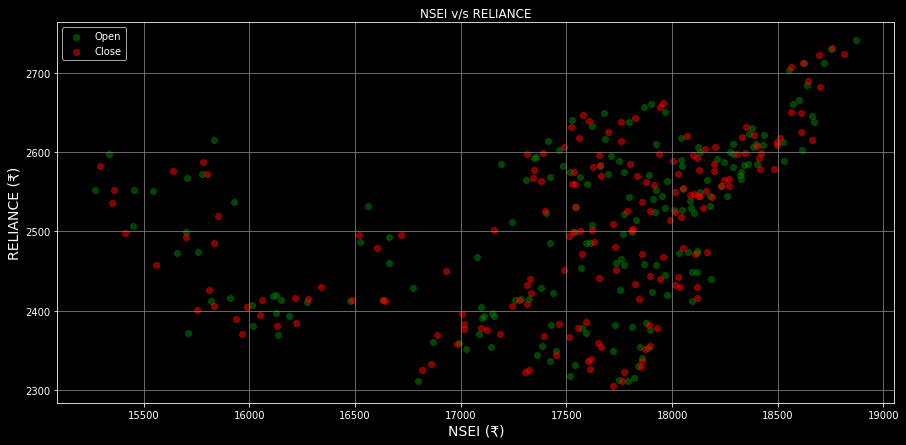

In [47]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei["Open"], reliance["Open"], color="green", label="Open", alpha=0.50)
plt.scatter(nsei["Close"], reliance["Close"], color="red", label="Close", alpha=0.50)
plt.legend()
plt.xlabel("NSEI (₹)",fontsize=14)
plt.ylabel("RELIANCE (₹)",fontsize=14)
plt.title("NSEI v/s RELIANCE")
plt.show()
plt.close()

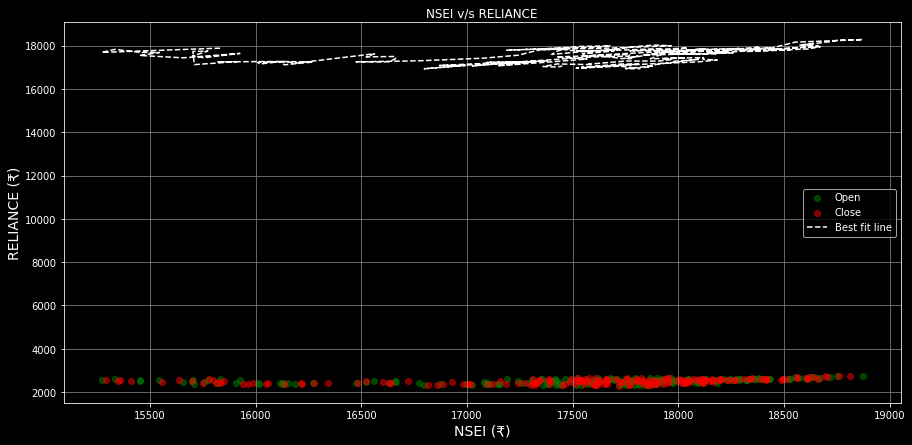

In [48]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei["Open"], reliance["Open"], color="green", label="Open", alpha=0.50)
plt.scatter(nsei["Close"], reliance["Close"], color="red", label="Close", alpha=0.50)
plt.plot(nsei["Open"], y_pred, color="white", linestyle="--", label="Best fit line")
plt.legend()
plt.xlabel("NSEI (₹)",fontsize=14)
plt.ylabel("RELIANCE (₹)",fontsize=14)
plt.title("NSEI v/s RELIANCE")
plt.show()
plt.close()

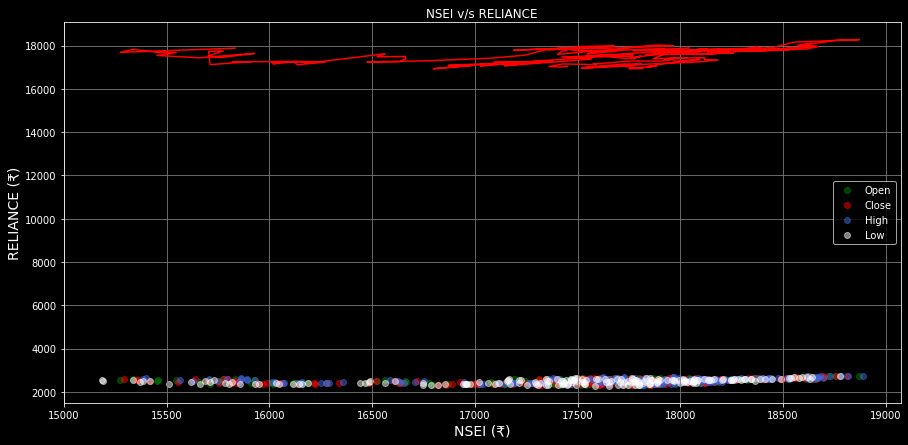

In [49]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei["Open"], reliance["Open"], color="green", label="Open", alpha=0.50)
plt.scatter(nsei["Close"], reliance["Close"], color="red", label="Close", alpha=0.50)
plt.scatter(nsei["High"], reliance["High"], color="royalblue", label="High", alpha=0.50)
plt.scatter(nsei["Low"], reliance["Low"], color="white", label="Low", alpha=0.50)
plt.plot(nsei["Open"], y_pred, color="red")
plt.legend()
plt.xlabel("NSEI (₹)",fontsize=14)
plt.ylabel("RELIANCE (₹)",fontsize=14)
plt.title("NSEI v/s RELIANCE")
plt.show()
plt.close()

In [40]:
from sklearn.linear_model import LinearRegression

In [42]:
x = nsei["Open"].values.reshape(-1,1)

In [43]:
y = reliance["Open"].values.reshape(-1,1)

In [44]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [45]:
sk_pred_y = model.predict(x)
sk_pred_y.shape

(180, 1)

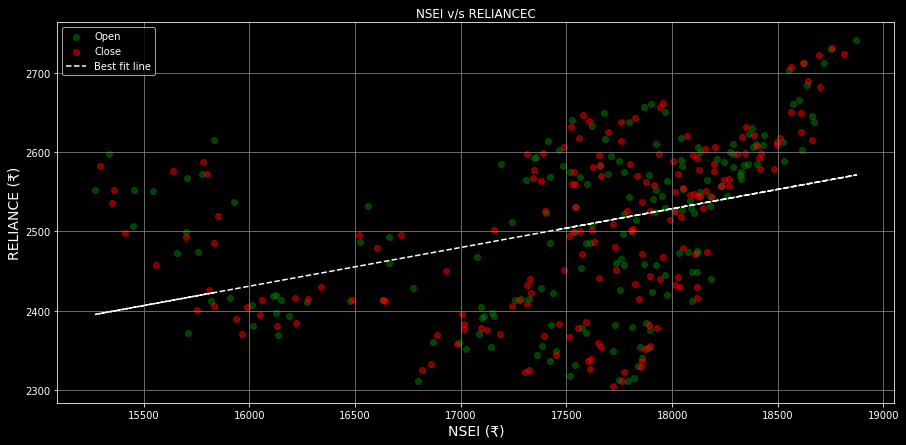

In [50]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei["Open"], reliance["Open"], color="green", label="Open", alpha=0.50)
plt.scatter(nsei["Close"], reliance["Close"], color="red", label="Close", alpha=0.50)
plt.plot(nsei["Open"], sk_pred_y, color="white", linestyle="--", label="Best fit line")
plt.legend()
plt.xlabel("NSEI (₹)",fontsize=14)
plt.ylabel("RELIANCE (₹)",fontsize=14)
plt.title("NSEI v/s RELIANCEC")
plt.show()
plt.close()

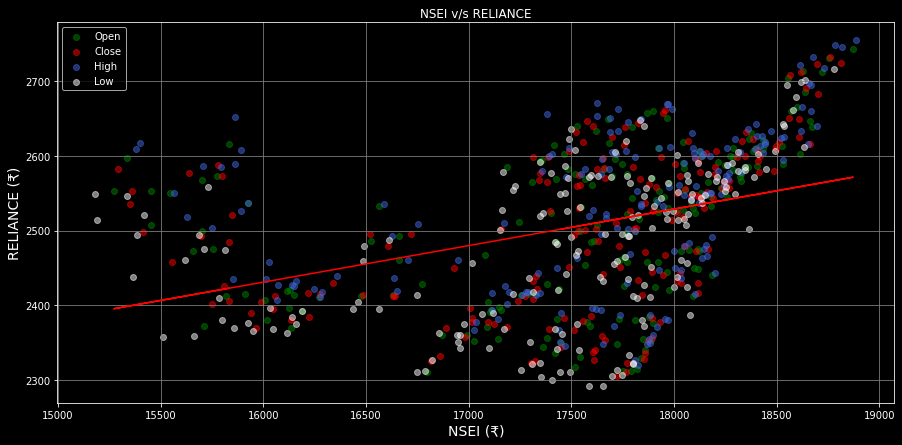

In [51]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.plot(nsei["Open"], sk_pred_y, color="red")
plt.scatter(nsei["Open"], reliance["Open"], color="green", label="Open", alpha=0.50)
plt.scatter(nsei["Close"], reliance["Close"], color="red", label="Close", alpha=0.50)
plt.scatter(nsei["High"], reliance["High"], color="royalblue", label="High", alpha=0.50)
plt.scatter(nsei["Low"], reliance["Low"], color="white", label="Low", alpha=0.50)
plt.legend()
plt.title("NSEI v/s RELIANCE")
plt.xlabel("NSEI (₹)",fontsize=14)
plt.ylabel("RELIANCE (₹)",fontsize=14)
plt.show()
plt.close()

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x = nsei["Open"].values.reshape(-1,1)
y = reliance["Open"].values.reshape(-1,1)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [55]:
print(f"x train: {x_train.shape}")
print(f"y train: {y_train.shape}")

x train: (144, 1)
y train: (144, 1)


In [56]:
print(f"x test: {x_test.shape}")
print(f"y test: {y_test.shape}")

x test: (36, 1)
y test: (36, 1)


In [57]:
model.fit(x_train, y_train)

LinearRegression()

In [58]:
y_pred = model.predict(x_test)
y_pred.shape

(36, 1)

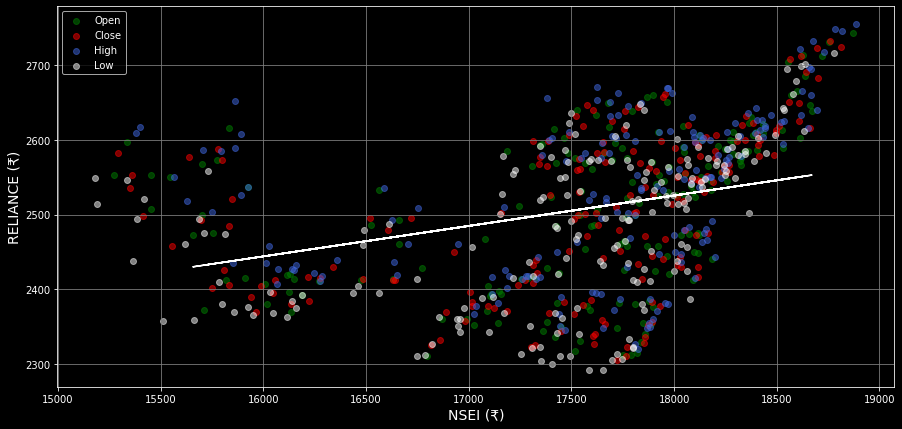

In [59]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei["Open"], reliance["Open"], color="green", label="Open", alpha=0.50)
plt.scatter(nsei["Close"], reliance["Close"], color="red", label="Close", alpha=0.50)
plt.scatter(nsei["High"], reliance["High"], color="royalblue", label="High", alpha=0.50)
plt.scatter(nsei["Low"], reliance["Low"], color="white", label="Low", alpha=0.50)
plt.plot(x_test, y_pred, color="white")
plt.legend()
plt.xlabel("NSEI (₹)",fontsize=14)
plt.ylabel("RELIANCE (₹)",fontsize=14)
plt.show()
plt.close()

In [61]:
x = nsei["Open"].values
y = reliance["Open"].values.reshape(-1,1)

In [62]:
x[:5]

array([15832.25      , 15272.65039062, 15334.5       , 15455.95019531,
       15545.65039062])

In [63]:
y[:5]

array([[2615.12656736],
       [2552.31563707],
       [2597.18049817],
       [2552.31574852],
       [2550.42151365]])

In [64]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [65]:
# Fit a linear regression model to the training data
reg = np.polyfit(x_train, y_train, 1)
b0, b1 = reg[1], reg[0]

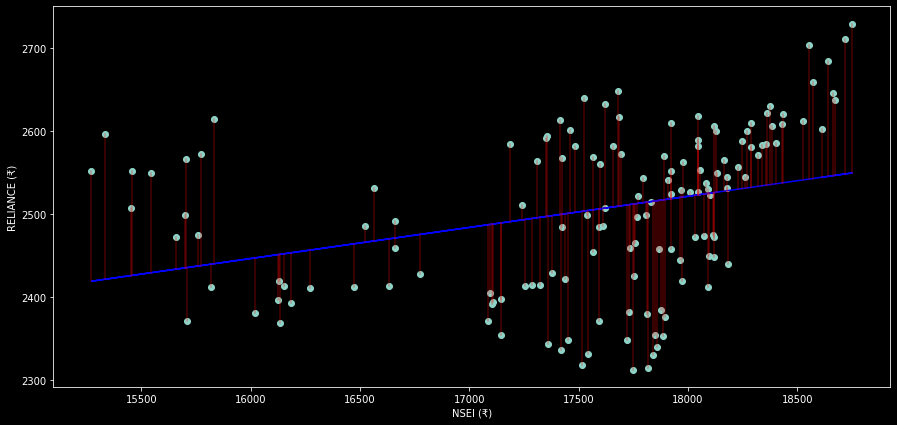

In [66]:
# Plot the training data and the best-fit line
plt.figure(figsize=(15,7))
plt.scatter(x_train, y_train)
plt.plot(x_train, b0 + b1 * x_train, '-b')

# Plot the error terms as red lines
for i in range(len(x_train)):
    plt.plot([x_train[i], x_train[i]], [y_train[i], b0 + b1 * x_train[i]], '-r', alpha=0.3)

plt.xlabel('NSEI (₹)')
plt.ylabel('RELIANCE (₹)')
plt.show()

In [67]:
x = nsei["Open"].values.reshape(-1,1)
y = reliance["Open"].values.reshape(-1,1)

In [68]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit a linear regression model to the training data
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

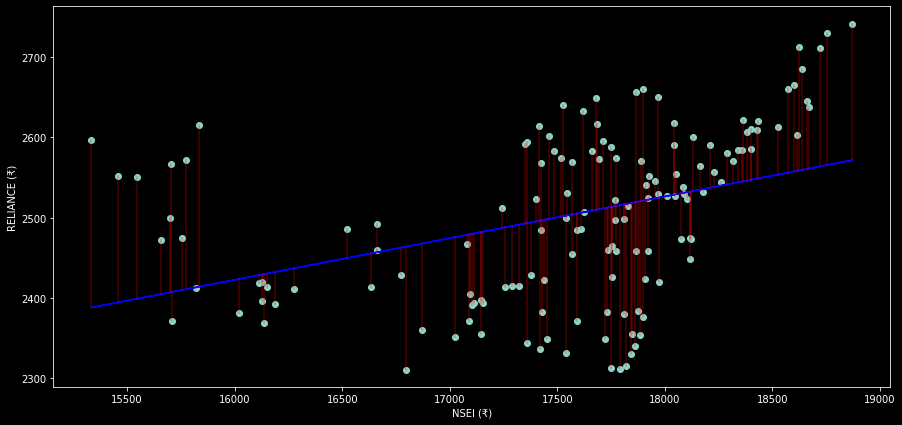

In [70]:
# Plot the training data and the best-fit line
plt.figure(figsize=(15,7))
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), '-b')

# Plot the error terms as red lines
for i in range(len(x_train)):
    plt.plot([x_train[i], x_train[i]], [y_train[i], reg.predict(x_train[i].reshape(-1,1))[0]], '-r', alpha=0.3)

plt.ylabel('RELIANCE (₹)')
plt.xlabel('NSEI (₹)')
plt.show()

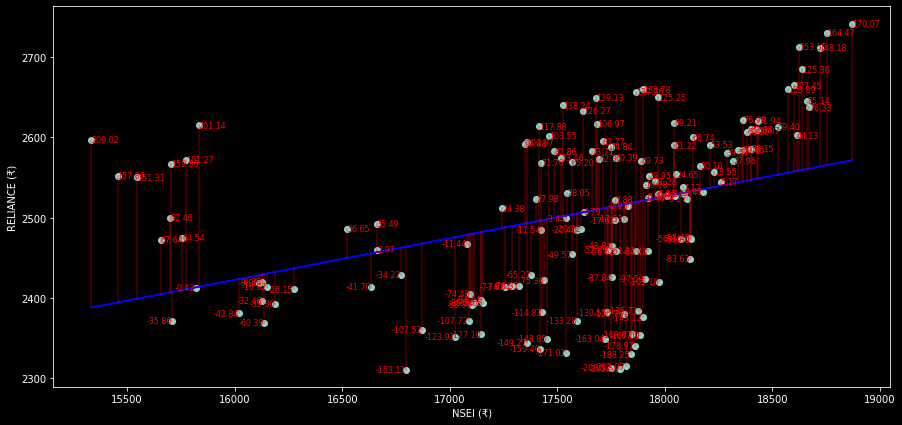

In [71]:
# Plot the training data and the best-fit line
plt.figure(figsize=(15,7))
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), '-b')

# Plot the error terms as red lines
for i in range(len(x_train)):
    x = x_train[i]
    y = y_train[i]
    error = y - reg.predict(x.reshape(-1,1))[0]
    align = 'left' if error > 0 else 'right'
    plt.plot([x, x], [y, reg.predict(x.reshape(-1,1))[0]], '-', color='red', alpha=0.3)
    plt.text(x+0.1, y+0.1, f'{error[0]:.2f}', color='red', fontsize=8, ha=align, va='center')

plt.ylabel('RELIANCE (₹)')
plt.xlabel('NSEI (₹)')
plt.show()

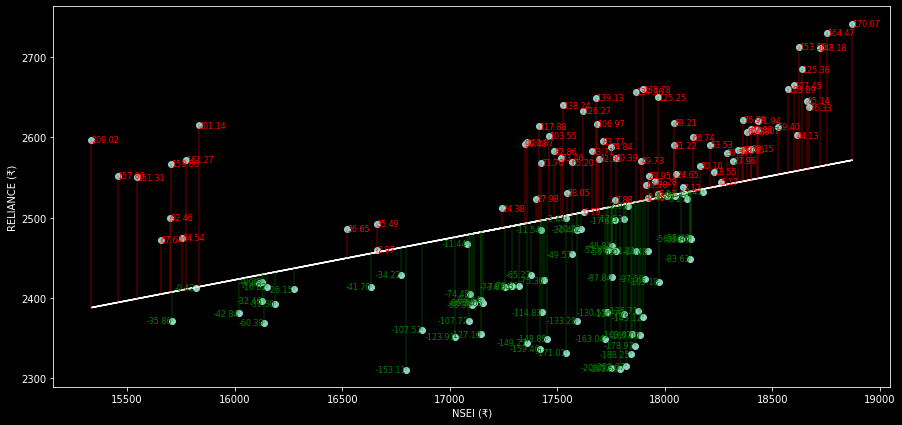

In [72]:
# Plot the training data and the best-fit line
plt.figure(figsize=(15,7))
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), '-b', color="white")

# Calculate the mean error
mean_error = y_train - reg.predict(x_train).flatten()
mean_error = np.mean(mean_error)

# Plot the error terms as red or green lines based on if the error is below or above the mean
for i in range(len(x_train)):
    x = x_train[i]
    y = y_train[i]
    error = y - reg.predict(x.reshape(-1,1))[0]
    align = 'left' if error > 0 else 'right'
    color = 'green' if error < mean_error else 'red'
    plt.plot([x, x], [y, reg.predict(x.reshape(-1,1))[0]], '-', color=color, alpha=0.3)
    plt.text(x+0.1, y+0.1, f'{error[0]:.2f}', color=color, fontsize=8, ha=align, va='center')

plt.ylabel('RELIANCE (₹)')
plt.xlabel('NSEI (₹)')
plt.show()

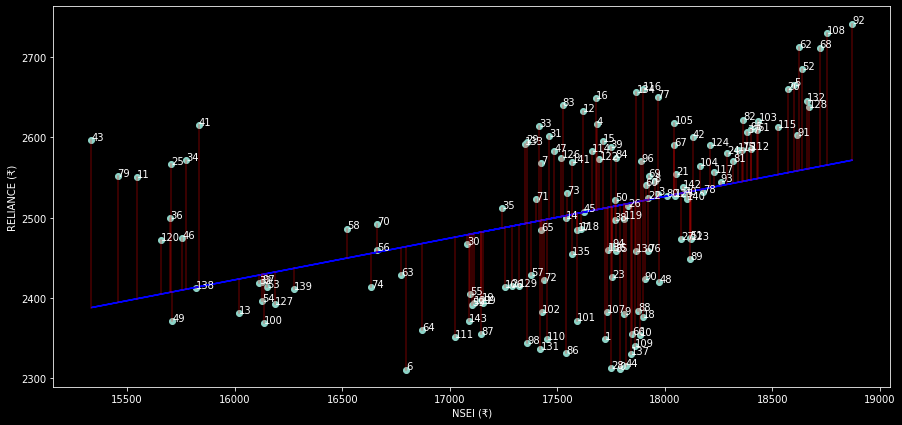

In [73]:
# Plot the training data and the best-fit line
plt.figure(figsize=(15,7))
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), '-b')

# Plot the error terms as red lines
for i in range(len(x_train)):
    plt.plot([x_train[i], x_train[i]], [y_train[i], reg.predict(x_train[i].reshape(-1,1))[0]], '-r', alpha=0.3)

# Label each data point with its index
for i, txt in enumerate(x_train):
    plt.annotate(i, (x_train[i], y_train[i]))
plt.ylabel('RELIANCE (₹)')
plt.xlabel('NSEI (₹)')
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = b0 + b1 * x_test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared:", r2)

RMSE: 87.38402119196047
R-squared: 0.10518608349421998
